### To explore various methods of reducing the issues brought upon by imbalanced datasets in ML problems

Learning phase and subsequent prediction of models can be affected by the problem of imbalanced datasets. More often than not, the decision function of classifiers would usually favour the majority class.

- Undersampling
- Oversampling
- Generate synthetic data for minority class

How should we rebalance dataset:
- Equal proportion of both classes?
- Majority stays represented?

No straight-forward answer as modifying datasets with resampling methods is changing reality.
Exercise with caution.

Evaluation methods

Accuracy based: classifier would as a matter of fact, always predict the majority class if real data is imbalanced.
Cost-based: 

In [2]:
# Packages
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from imblearn.datasets import make_imbalance
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

/home/juanchia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Loading in datasets

In [ ]:
# Iris
iris_df = load_iris()
x = iris_df.data
y = iris_df.target

In [ ]:
# Check class
Counter(y)

In [3]:
# Credit-card kaggle
cc_df = pd.read_csv("creditcard.csv")

In [4]:
# X: features
x_cc = cc_df.iloc[:,1:30]
x_cc = np.array(x_cc)

# Y: labels
y_cc = cc_df['Class'].values

In [5]:
# Check class
Counter(y_cc)

Counter({0: 284315, 1: 492})

In [6]:
str((492/284315)*100) + ' %'

'0.17304750013189596 %'

#### Creating imbalance

In [ ]:
# Iris: Manually create an imbalanced dataset
X, Y = make_imbalance(x, y, sampling_strategy={0: 24, 2: 50}, random_state=42)

#### Resampling Techniques

In [8]:
## Oversampling
from imblearn import over_sampling

In [5]:
# Random over-sampling of minority class (naive)
## Duplicating some of the original samples of the minority class(Picking sample at random with replacement). Gives equal distribution of each class
pl_ros = make_pipeline_imb(
    over_sampling.RandomOverSampler(random_state=42),
    LinearSVC(random_state=42))

Both SMOTE and ADASYN uses the same algorithm to generate sample.  
A new sample x_new is generated by looking at the classes of the k-nearest-neighbours:
 
   $x_{new} = x_i + \lambda \times (x_{zi} - x_i)$ 
 
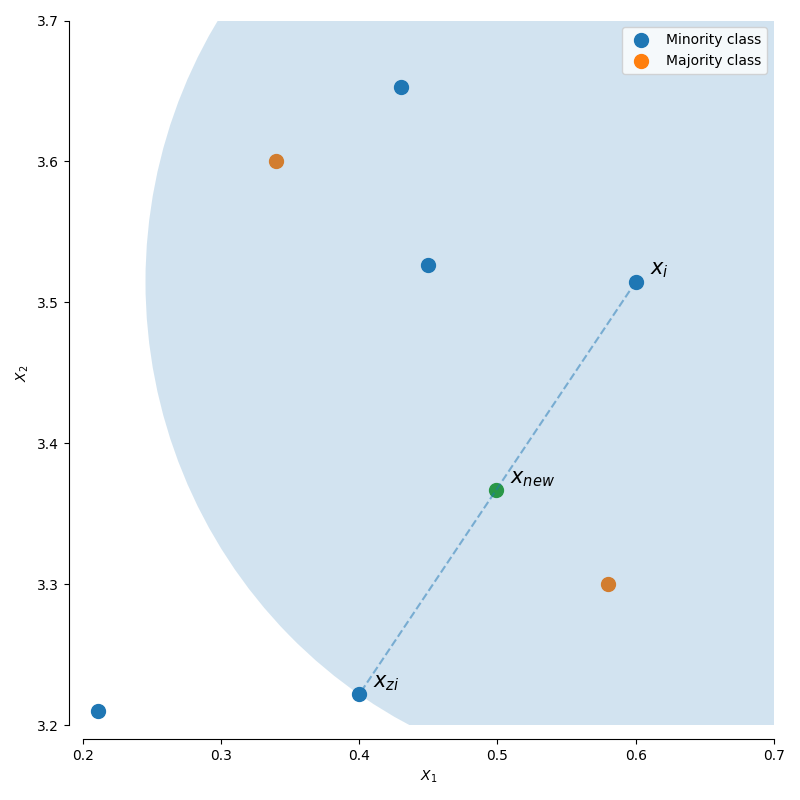

#### SMOTE variants

SMOTE-C: sampling for categorical variables.
- Categories of new generated sample are decided by picking the most frequent category of the nearest neighbors present during the generation1.

In [9]:
# SMOTE: Synthetic Minority Oversampling Technique
pl_smote = make_pipeline_imb(
    over_sampling.SMOTE(random_state=42),
    LinearSVC(random_state=42))

In [10]:
# ADASYN: Adaptive Synthetic sampling
pl_adasyn = make_pipeline_imb(
    over_sampling.ADASYN(random_state=42),
    LinearSVC(random_state=42))

#### Train-test split

In [11]:
# For different datasets
X = x_cc
Y = y_cc

In [12]:
# Original
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [8]:
# Resampled: Doing this is wrong as we want to resample only the train, not the test and train.
# Comparing the `sup` for this and that via pipeline and original shows the error
X_rs, Y_rs = over_sampling.RandomOverSampler(random_state=42).fit_resample(X, Y)

x_train_rs, x_test_rs, y_train_rs, y_test_rs = train_test_split(X_rs, Y_rs, random_state=42)

#### Train model

In [9]:
# Train classifier with original
clf = LinearSVC(random_state=42).fit(x_train, y_train)
# Train classifier with resampling
clf_rs = LinearSVC(random_state=42).fit(x_train_rs, y_train_rs)
# Train classifier with resampling via pipeline ROS
pl_ros.fit(x_train, y_train)

/home/juanchia/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juanchia/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juanchia/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [16]:
# Train classifier with resampling via pipeline SMOTE
pl_smote.fit(x_train, y_train)
# Train classifier with resampling via pipeline ADASYN
pl_adasyn.fit(x_train, y_train)

/home/juanchia/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juanchia/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('adasyn',
                 ADASYN(n_jobs=1, n_neighbors=5, random_state=42, ratio=None,
                        sampling_strategy='auto')),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

#### Evaluation

In [14]:
# Evaluate original and resampled
from imblearn.metrics import classification_report_imbalanced

In [10]:
# Original
print("Original")
print(classification_report_imbalanced(y_test, clf.predict(x_test)))

# Resampled
print('Resampled')
print(classification_report_imbalanced(y_test_rs, clf_rs.predict(x_test_rs)))

# Resampled via pipeline ROS
print(classification_report_imbalanced(y_test, pl_ros.predict(x_test)))

Original
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.67      1.00      0.82      0.69     71089
          1       0.83      0.67      1.00      0.74      0.82      0.65       113

avg / total       1.00      1.00      0.67      1.00      0.82      0.69     71202

Resampled
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.99      0.82      0.91      0.90      0.83     71023
          1       0.99      0.82      0.99      0.90      0.90      0.80     71135

avg / total       0.92      0.91      0.91      0.90      0.90      0.81    142158

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.90      0.99      0.94      0.89     71089
          1       0.06      0.90      0.98      0.11      0.94      0.87       113

avg / total       1.00      0.98      0.90      0.99      0.

In [17]:
# Resampled via pipeline SMOTE
print(classification_report_imbalanced(y_test, pl_smote.predict(x_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.86      0.99      0.92      0.86     71089
          1       0.08      0.86      0.98      0.15      0.92      0.83       113

avg / total       1.00      0.98      0.86      0.99      0.92      0.86     71202



In [18]:
# Resampled via pipeline ADASYN
print(classification_report_imbalanced(y_test, pl_adasyn.predict(x_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.95      0.89      0.97      0.92      0.85     71089
          1       0.03      0.89      0.95      0.05      0.92      0.84       113

avg / total       1.00      0.95      0.89      0.97      0.92      0.85     71202



#### Ploting Precision-Recall  & ROC curves

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

from sklearn.calibration import CalibratedClassifierCV

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Ploting Precision-Recall  & ROC curves

lr_model = CalibratedClassifierCV(base_estimator=LinearSVC(random_state=42), cv=5)
lr_model.fit(x_train_rs, y_train_rs)
res = lr_model.predict_proba(x_test_rs)[:, 1]

# pr, roc curves
p,r,_ = precision_recall_curve(y_test_rs, res)
tpr,fpr,_ = roc_curve(y_test_rs, res)

In [ ]:
# https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

ax1.plot(r,p,c='b')
ax2.plot(tpr,fpr,c='r')

plt.show()

In [ ]:
# Illustrate imbalance dataset

In [ ]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1:3].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [ ]:
fig, ax1 = plt.subplots(1,2, figsize=(15, 7))

In [ ]:
clf = LinearSVC().fit(X, Y)

In [ ]:
plot_decision_function(X, Y, clf, ax1)

In [ ]:
from sklearn.datasets import make_classification
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [ ]:
X1, y1 = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94),
                      class_sep=0.8)

In [ ]:
X = X1
y = y1

In [ ]:
clf = LinearSVC().fit(X, y)

In [ ]:
xx

In [ ]:
yy

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

In [ ]:
# def plot_decision_function(X, y, clf, ax):
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1:3].min() - 1, X[:, 1:3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

In [ ]:
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [ ]:
plot_decision_function(X, y, clf, ax1)

In [ ]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(iris.data, iris.target,
                      sampling_strategy={0: 25, 1: 50, 2: 50},
                      random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))